### Naives Bayes Classification 
We are trying to make a Naives Bayes model, that can predict top10, 
with features final_draw_position, final_televote_points, final_jury_points

#### Import Libraries

In [6]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

#### Load Data

In [8]:
df = pd.read_csv('Data/finalists_cleaned.csv')

#### Handle Missing Values

In [10]:
df.isnull().sum()

year                       0
final_draw_position        0
country                    0
style                      0
final_televote_points     32
final_jury_points         32
final_televote_votes     128
final_jury_votes         128
final_place                0
final_total_points         0
dtype: int64

Since we know what features we are gonna use in this model, we are only looking into those for inspection

In [12]:
# Show rows where final_televote_points or final_jury_points is NaN
df[df['final_televote_points'].isna() | df['final_jury_points'].isna()]


,year,final_draw_position,country,style,final_televote_points,final_jury_points,final_televote_votes,final_jury_votes,final_place,final_total_points
212,2014,24,Netherlands,Traditional,NaN,NaN,NaN,NaN,2.0,0.0
231,2013,7,Estonia,Ballad,NaN,NaN,NaN,NaN,20.0,0.0
232,2013,18,Denmark,Pop,NaN,NaN,NaN,NaN,1.0,0.0
233,2013,10,Russia,Ballad,NaN,NaN,NaN,NaN,5.0,0.0
234,2013,22,Ukraine,Pop,NaN,NaN,NaN,NaN,3.0,0.0
235,2013,13,Netherlands,Ballad,NaN,NaN,NaN,NaN,9.0,0.0
236,2013,2,Lithuania,Dance,NaN,NaN,NaN,NaN,22.0,0.0
237,2013,8,Belarus,Dance,NaN,NaN,NaN,NaN,16.0,0.0
238,2013,3,Moldova,Ballad,NaN,NaN,NaN,NaN,11.0,0.0
239,2013,26,Ireland,Pop,NaN,NaN,NaN,NaN,26.0,0.0


This visualize that the final_televotes_points and final_jury_points in 2013 is missing for all the countries, there for we decide to remove the whole year. Bonus info - we first ran the model with 2013 at got a F1-score on 0.91, but after we removed it we hit 0,96.

In [18]:
df = df[df['year'] != 2013]

#### Create Binary Target Variable

In [16]:
# Binary classification: 1 = Top 10, 0 = Not Top 10
df['top_10'] = df['final_place'].apply(lambda x: 1 if x <= 10 else 0)

#### Select Features and Target

In [19]:
features = [
    'final_draw_position',
    'final_televote_points', 'final_jury_points'
]
X = df[features]
y = df['top_10']

In [21]:
print(X.isna().sum())

final_draw_position      0
final_televote_points    6
final_jury_points        6
dtype: int64


In [23]:
X = X.fillna(X.mean())

Since there is only 6 nans in both final_televote_points and final_jury_points we are filling them with mean

In [26]:
X.shape

(332, 3)

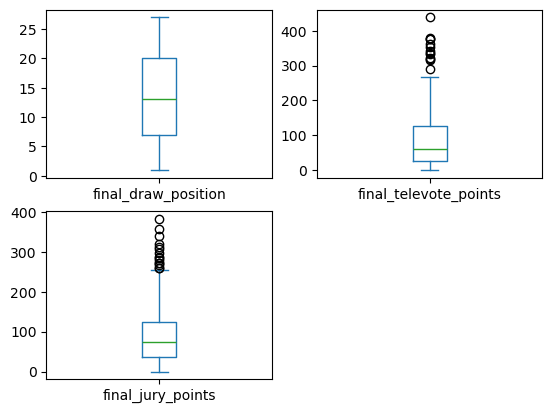

In [28]:
X.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

shows alot of outlier. But since these points represent that some scores a high amount of points and some allmost nothing.

#### Splitting For Test

In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

#### Train Naive Bayes Model

In [35]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [37]:
model.score(X_train, y_train)

0.9169811320754717

In [39]:
model.score(X_test, y_test)

0.9552238805970149

#### Evaluate Model Performance

Accuracy: 0.9552238805970149
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.96      0.93      0.95        28

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



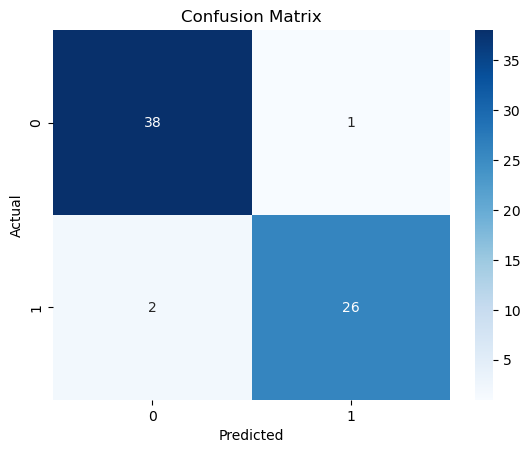

In [42]:
y_pred = model.predict(X_test)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Images/NB_confusion_matrix.png')
plt.show()

The F1 score of 0.96 indicates a high level of accuracy in Naive bayes classification model. 

#### Prediction on a New Sample

In [46]:
sample = [[2, 20, 13]]  # draw, televote pts, jury pts
sample_df = pd.DataFrame(sample, columns=features)
prediction = model.predict(sample_df)
print("Top 10 prediction:", "Yes" if prediction[0] == 1 else "No")

Top 10 prediction: No


#### Saving The Model

In [ ]:
import joblib

In [ ]:
# Store the model in a file
model_file = 'Models/bayes.pkl'

In [ ]:
joblib.dump(model, model_file)